In [8]:
import pandas as pd

xlsx_link = 'https://docs.google.com/spreadsheets/d/1ge20fpSWJgiuI_6Cn5KyBKnkLe4gVhW9GutD-Qf5z38/export'
df = pd.read_excel(xlsx_link)

In [11]:
# build tech_rev

import numpy as np

quarters = df['Quarter']
revenue_total = df['Revenue(MNTD)'] / 1000 # in billion NTD

technologies = df.columns.drop(['Quarter', 'Revenue(MNTD)', 'shipment(Kpcs)'])

def nan2zero(arr):
    return np.array([0.0 if np.isnan(v) else v for v in arr])

def revbytech(tech : str):
    share = df[tech] # percentage
    return nan2zero(share * revenue_total)

tech_rev : dict = { tech : revbytech(tech) for tech in technologies}


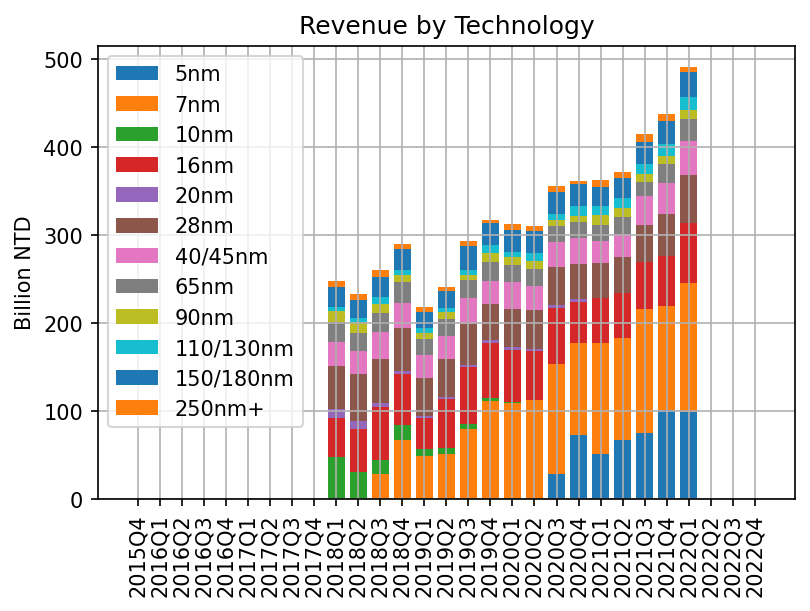

In [12]:
xlabels = quarters
label_bar : dict = tech_rev

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bottom = 0
for label, bar in label_bar.items():
    ax.bar(xlabels, bar, bottom=bottom, label=label)
    bottom += bar
  
ax.set_ylabel('Billion NTD')
ax.set_title('Revenue by Technology')
ax.legend()

fig.set_dpi(150)

plt.xticks(rotation=90)
plt.grid()
plt.show()